In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk
from tensorflow import keras
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import random

**Introduction to CNN and Computer Vision with Tensorflow**
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as camera of a self-driving car, recognizing the objects such as (cars, people, buses...) around their surrounding.

# Get the data

In [ ]:
import zipfile

# Download zip file of pizza_steak images to the current working directory.
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-11-21 04:51:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  97.5MB/s    in 1.1s    

2025-11-21 04:51:17 (97.5 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



# Becoming one with Data (Inspect the data)

In [ ]:
!ls pizza_steak # It means list the files and folders inside of pizza_steak.

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
import os
# Walk through the pizza_steak directory, and list the number of files.For this purpose we use os.walk() function.
path = os.getcwd()
print(path)
for dirpath, dirnames, filename in os.walk(os.path.join(path, "pizza_steak")):
  print(f"There are {len(dirnames)} directories and {len(filename)} images in {dirpath}")

### PRACTICE ###
def lol():
  check = os.walk("pizza_steak")
  print(type(check))
  print(check)

lol()

/content
There are 2 directories and 0 images in /content/pizza_steak
There are 2 directories and 0 images in /content/pizza_steak/test
There are 0 directories and 250 images in /content/pizza_steak/test/pizza
There are 0 directories and 250 images in /content/pizza_steak/test/steak
There are 2 directories and 0 images in /content/pizza_steak/train
There are 0 directories and 750 images in /content/pizza_steak/train/pizza
There are 0 directories and 750 images in /content/pizza_steak/train/steak
<class 'generator'>
<generator object walk at 0x7b8cbaec6fb0>


In [ ]:
# Another way to find out, how many images are there in a folder.
for i in ["pizza", "steak"]:
 print(f"There are {len(os.listdir(os.path.join(path, "pizza_steak", "train" ,f"{i}")))} images in train folder of {i}.")
 print(f"There are {len(os.listdir(os.path.join(path, "pizza_steak", "test" ,f"{i}")))} images in test folder of {i}.")

There are 750 images in train folder of pizza.
There are 250 images in test folder of pizza.
There are 750 images in train folder of steak.
There are 250 images in test folder of steak.


In [ ]:
# Getting the class names programmatically.
import pathlib
from pathlib import Path

class_names = sorted([item.name for item in Path("pizza_steak/train").glob("*")])
print(class_names)

['pizza', 'steak']


pizza_steak/train/pizza
['2606727.jpg']
<class 'numpy.ndarray'>


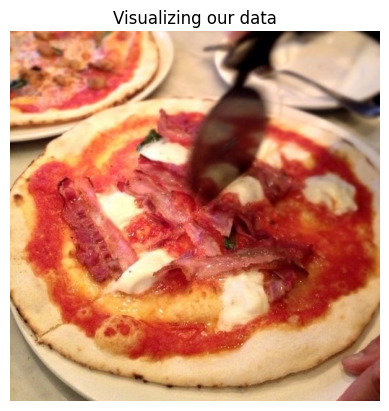

Image Shape = (512, 512, 3)


In [ ]:
#  Let's visualize our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  """ Inorder to visualize a single random image from a target directory
  where target_class can be for example either a pizza or steak or ... """

  target_folder = target_dir + "/" + target_class
  print(target_folder)

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Displaying random_image
  img = mpimg.imread(target_folder + "/" + random_image[0]) # Here, we use random_image[0] as random.sample returns
                                                            # a list like this ['1633289.jpg'] not a string.
  print(type(img))
  plt.imshow(img)
  plt.title("Visualizing our data")
  plt.axis("off")
  plt.show()
  print(f"Image Shape = {img.shape}")

  return img

image = view_random_image("pizza_steak/train", "pizza")

In [ ]:
# What tensor flow does is, it converts our images into tensors.
tf.constant(image)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[185, 121,  83],
        [181, 118,  77],
        [178, 113,  71],
        ...,
        [  1,   0,   2],
        [  3,   0,   2],
        [  3,   0,   2]],

       [[195, 131,  93],
        [191, 127,  89],
        [187, 122,  80],
        ...,
        [  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   2]],

       [[209, 145, 109],
        [204, 140, 102],
        [200, 135,  95],
        ...,
        [  0,   0,   4],
        [  0,   0,   4],
        [  0,   0,   4]],

       ...,

       [[194, 174, 124],
        [200, 180, 130],
        [205, 184, 137],
        ...,
        [ 79,  24,  17],
        [ 85,  30,  25],
        [ 88,  33,  28]],

       [[199, 178, 131],
        [203, 182, 135],
        [204, 183, 138],
        ...,
        [ 77,  22,  17],
        [ 79,  24,  21],
        [ 79,  24,  21]],

       [[198, 177, 130],
        [198, 177, 130],
        [198, 177, 132],
        ...,
        [ 75,  20,  1

In [ ]:
# We need to preprocess our data For example, look below
image/255. # Here, as 255 is the maximum value for a indivisual pixel so it will scale between 0 and 1.
            # "dot(.)" is used to convert to float.

array([[[0.7254902 , 0.4745098 , 0.3254902 ],
        [0.70980392, 0.4627451 , 0.30196078],
        [0.69803922, 0.44313725, 0.27843137],
        ...,
        [0.00392157, 0.        , 0.00784314],
        [0.01176471, 0.        , 0.00784314],
        [0.01176471, 0.        , 0.00784314]],

       [[0.76470588, 0.51372549, 0.36470588],
        [0.74901961, 0.49803922, 0.34901961],
        [0.73333333, 0.47843137, 0.31372549],
        ...,
        [0.00392157, 0.        , 0.00784314],
        [0.00392157, 0.        , 0.00784314],
        [0.00392157, 0.        , 0.00784314]],

       [[0.81960784, 0.56862745, 0.42745098],
        [0.8       , 0.54901961, 0.4       ],
        [0.78431373, 0.52941176, 0.37254902],
        ...,
        [0.        , 0.        , 0.01568627],
        [0.        , 0.        , 0.01568627],
        [0.        , 0.        , 0.01568627]],

       ...,

       [[0.76078431, 0.68235294, 0.48627451],
        [0.78431373, 0.70588235, 0.50980392],
        [0.80392157, 0

# Using ImageDataGenerator Class

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# tf.random.set_seed(42)
# # 1. Define the generator with augmentation parameters
# train_datagen = ImageDataGenerator(
#     rescale=1./255, # Normalize pixel values to 0-1
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # 2. Connect the generator to your image directory
# training_set = train_datagen.flow_from_directory(
#     'data/train',             # Path to your training data directory
#     target_size=(150, 150),   # All images will be resized to 150x150
#     batch_size=32,
#     class_mode='binary'       # Use 'binary' for 2 classes, 'categorical' for >2
# )

# # 3. Use the output for model training
# # model.fit(training_set, epochs=...)

# Using image_dataset_from_directory() utility function(keras) instead of ImageDataGenerator which is depreciated now